In [1]:
import skfuzzy as fuzz
import numpy as np
import pandas as pd
from skfuzzy import control as ctrl

In [2]:
linear_x = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'linear_x')
linear_y = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'linear_y')
linear_z = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'linear_z')
angular_x = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'angular_x')
action = ctrl.Consequent(np.arange(0, 6, 1), 'action')

In [3]:
linear_x['l'] = fuzz.trimf(linear_x.universe, [0, 0.3, .5])
linear_x['m'] = fuzz.trimf(linear_x.universe, [0.1, .4, .6])
linear_x['h'] = fuzz.trimf(linear_x.universe, [.2, .5, .7])

linear_y['l'] = fuzz.trimf(linear_y.universe, [0, 0.3, .5])
linear_y['m'] = fuzz.trimf(linear_y.universe, [0.1, .4, .6])
linear_y['h'] = fuzz.trimf(linear_y.universe, [.2, .5, .7])

linear_z['l'] = fuzz.trimf(linear_z.universe, [0, 0.3, .5])
linear_z['m'] = fuzz.trimf(linear_z.universe, [0.1, .4, .6])
linear_z['h'] = fuzz.trimf(linear_z.universe, [.2, .5, .7])

angular_x['l'] = fuzz.trimf(angular_x.universe, [0, 0.3, .5])
angular_x['m'] = fuzz.trimf(angular_x.universe, [0.1, .4, .6])
angular_x['h'] = fuzz.trimf(angular_x.universe, [.2, .5, .7])

# Result
action['bicep_up'] = fuzz.trimf(action.universe, [0, 0, 1])
action['bicep_down'] = fuzz.trimf(action.universe, [0, 1, 2])
action['elbow_rot'] = fuzz.trimf(action.universe, [1, 2, 3])
action['shoulder_up'] = fuzz.trimf(action.universe, [2, 3, 4])
action['shoulder_down'] = fuzz.trimf(action.universe, [3, 4, 5])
action['wrist_up'] = fuzz.trimf(action.universe, [4, 5, 5])

In [4]:
wrist_up = ctrl.Rule(linear_x['m'] & linear_y['l'] & linear_z['h'] & angular_x['l'], action['wrist_up'])
bicep_down = ctrl.Rule(linear_x['h'] & linear_y['l'] & linear_z['m'] & angular_x['h'], action['bicep_down'])
bicep_up = ctrl.Rule(linear_x['m'] & linear_y['l'] & linear_z['m'] & angular_x['m'], action['bicep_up'])
shoulder_up = ctrl.Rule(linear_x['m'] & linear_y['h'] & linear_z['m'] & angular_x['h'], action['shoulder_up'])
shoulder_down = ctrl.Rule(linear_x['h'] & linear_y['h'] & linear_z['l'] & angular_x['m'], action['shoulder_down'])
elbow_rot = ctrl.Rule(linear_x['h'] & linear_y['l'] & linear_z['m'] & angular_x['m'], action['elbow_rot'])

In [6]:
action_ctrl = ctrl.ControlSystem([wrist_up, bicep_down, bicep_up, shoulder_up, shoulder_down, elbow_rot])
movement = ctrl.ControlSystemSimulation(action_ctrl)

In [12]:
movement.input['linear_x'] = 0.4
movement.input['linear_y'] = 0.3
movement.input['linear_z'] = 0.5
movement.input['angular_x'] = 0.3

In [13]:
movement.compute()

2.477060931899642


/home/mvp18/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


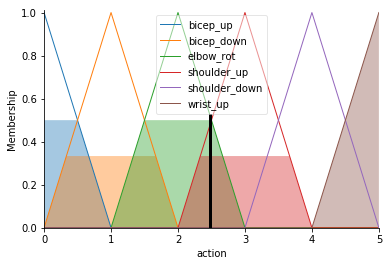

In [14]:
print(movement.output['action'])
action.view(sim=movement)